In [1]:
import keras
import numpy as np
import pandas as pd
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils
from keras import optimizers
np.random.seed(10)

# 載入資料
(x_train_image, y_train_label), (x_test_image, y_test_label) = mnist.load_data() # 載入資料
print("train data=",len(x_train_image))
print("test  data=",len(x_test_image))

Using TensorFlow backend.


train data= 60000
test  data= 10000


In [2]:
x_train_image.shape

(60000, 28, 28)

# 資料前置處理
Neural network 的輸入必須為數值(numeric), 因為要跟weights做運算

非數值(名目、順序)的資料要做轉換為數值, 例如: One-hot encoding

建議re-scale到接近的數值範圍

In [3]:
#資料轉換
x_train = x_train_image.reshape(60000, 784) #28x28=784 (one-dimensional sequence data)
x_test = x_test_image.reshape(10000, 784)
x_train = x_train.astype('float32') #型別轉換
x_test = x_test.astype('float32')
x_train_norm = x_train/255 # 正規化 (0~1)
x_test_norm = x_test/255 

In [4]:
x_train_norm.shape

(60000, 784)

In [5]:
x_train_norm[0]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [6]:
# 將 label 編碼， one-hot-encoding
num_classes = 10 # 分類數量 0~9
y_train_ohe = keras.utils.to_categorical(y_train_label, num_classes)
y_test_ohe = keras.utils.to_categorical(y_test_label, num_classes)

In [7]:
y_train_ohe[:5]

array([[ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]])

# 建立模型

In [8]:
model = Sequential() # Build Linear Model
model.add(Dense(units=512, input_dim=784, activation='relu', name='hidden_1')) # Dense: full connection
model.add(Dense(units=512, activation='relu', name='hidden_2')) # Dense: full connection
model.add(Dense(units=num_classes, activation='softmax', name='output')) # output: num_classes = 10

# 網路結構
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_1 (Dense)             (None, 512)               401920    
_________________________________________________________________
hidden_2 (Dense)             (None, 512)               262656    
_________________________________________________________________
output (Dense)               (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


# 定義訓練方式
 (1) loss : 設定 loss function (mean_squared_error, categorical_crossentropy...etc)
        
 (2) optimizer : 設定訓練時的優化方法 (rmsprop, sgd, adam...etc)
    
 (3) metrics : 設定評估模型的方式是 accuracy (準確率)


In [9]:
model.compile(loss='mean_squared_error',
              optimizer='rmsprop',
              metrics=['accuracy'])

# 開始訓練

In [10]:
batch_size = 128 # mini-batch 每一批次的訓練筆數
epochs = 10 # 執行週期
verbose = 1 # Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch. 是否顯示訓練過程

#訓練: x_train_norm, 驗證: x_test_norm
history = model.fit(x_train_norm, y_train_ohe,
                    batch_size=batch_size,
                    validation_data=(x_test_norm, y_test_ohe),
                    epochs=epochs,
                    verbose=verbose)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 191us/step - loss: 0.0113 - acc: 0.9240 - val_loss: 0.0050 - val_acc: 0.9678
Epoch 2/10
60000/60000 [==============================] - 11s 186us/step - loss: 0.0045 - acc: 0.9712 - val_loss: 0.0044 - val_acc: 0.9717
Epoch 3/10
60000/60000 [==============================] - 11s 187us/step - loss: 0.0033 - acc: 0.9788 - val_loss: 0.0040 - val_acc: 0.9740
Epoch 4/10
60000/60000 [==============================] - 11s 191us/step - loss: 0.0025 - acc: 0.9839 - val_loss: 0.0038 - val_acc: 0.9755
Epoch 5/10
60000/60000 [==============================] - 11s 192us/step - loss: 0.0022 - acc: 0.9865 - val_loss: 0.0034 - val_acc: 0.9780
Epoch 6/10
60000/60000 [==============================] - 11s 189us/step - loss: 0.0018 - acc: 0.9888 - val_loss: 0.0038 - val_acc: 0.9766
Epoch 7/10
60000/60000 [==============================] - 11s 188us/step - loss: 0.0016 - acc: 0.9900 - val_loss: 0.

# 評估模型準確率

In [11]:
#評估模型準確率
score = model.evaluate(x_test_norm, y_test_ohe, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.00316974874135
Test accuracy: 0.9817


# 顯示訓練過程

In [12]:
#顯示訓練過程
import matplotlib.pyplot as plt  
def show_train_history(train_history, train, validation):
    epochs = range(1, len(train_history.history[train]) + 1)
    plt.plot(epochs, train_history.history[train], 'b')  
    plt.plot(epochs, train_history.history[validation], 'r')  
    plt.title('Train History')  
    plt.ylabel(train)  
    plt.xlabel('Epoch')  
    plt.legend(['train', 'validation'], loc='upper left')  
    plt.show()

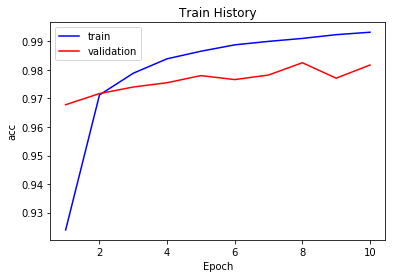

In [13]:
show_train_history(history, 'acc', 'val_acc')

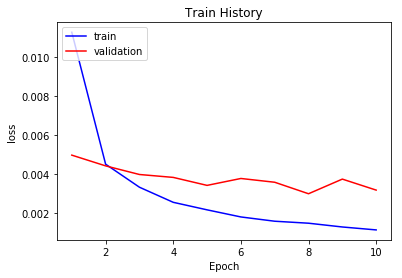

In [14]:
show_train_history(history, 'loss', 'val_loss')